In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


%matplotlib inline

In [2]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/homeworks/statistics/lesson2/conversion.csv')

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [5]:
df.shape

(1143, 11)

In [6]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [7]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [8]:
df.xyz_campaign_id.value_counts()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

In [9]:
# 4 Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) 
# для каждой рекламной кампании в Facebook, прологарифмировав значения. Выберите верные утверждения:

In [12]:
df4 = df.groupby('fb_campaign_id', as_index = False).agg(count_Impressions = ('Impressions','count'))

In [15]:
df4.head()

,fb_campaign_id,count_Impressions
0,103916,1
1,103917,1
2,103920,1
3,103928,2
4,103929,1


In [16]:
df4['log'] = df4['count_Impressions'].apply(lambda x: np.log(x))

In [18]:
df4.head()

,fb_campaign_id,count_Impressions,log
0,103916,1,0.000000
1,103917,1,0.000000
2,103920,1,0.000000
3,103928,2,0.693147
4,103929,1,0.000000


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


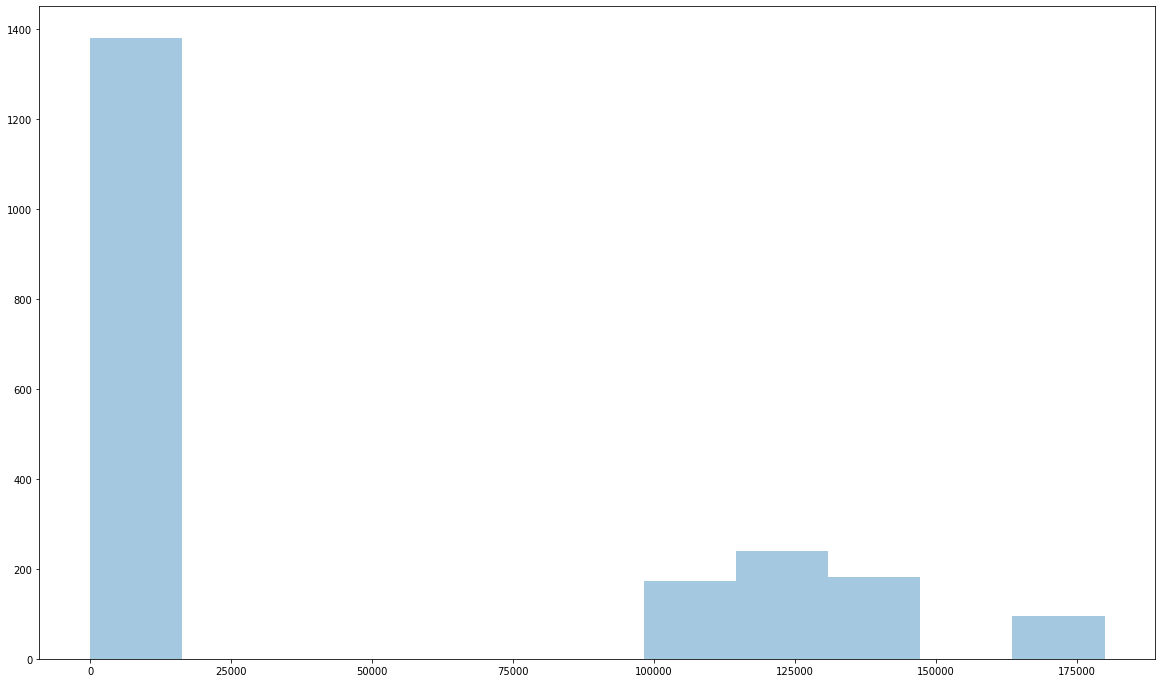

In [21]:
plt.figure(figsize=(20, 12))
sns.distplot(df4, kde = False)

In [ ]:
# 5 Создайте новую колонку, затем посмотрите на описательные статистики. 
# В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [23]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [39]:
df['CTR'] = df.Clicks/df.Impressions

In [40]:
df.sort_values('CTR', ascending = False)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531
...,...,...,...,...,...,...,...,...,...,...,...,...
270,777166,936,115625,30-34,M,63,2383,0,0.00,1,1,0.000000
269,777131,936,115619,35-39,M,16,6359,0,0.00,1,0,0.000000
268,777130,936,115619,35-39,M,16,6260,0,0.00,1,0,0.000000
266,776935,936,115587,45-49,M,36,1136,0,0.00,1,1,0.000000


In [ ]:
# 6 Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). 
# Какому графику соответствует распределение CTR кампании 916?

In [45]:
df6 = df.query('xyz_campaign_id == "916"')

In [47]:
df6.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


In [46]:
plt.figure(figsize=(20, 12))
sns.distplot(df6, x = 'xyz_campaign_id', y = 'CTR', kde = False, bins = 20)

TypeError: distplot() got an unexpected keyword argument 'y'

<Figure size 1440x864 with 0 Axes>

In [ ]:
# дохуя почему-то слетело, сорян

In [ ]:
# 9 Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, 
# округлив значение до 2 знаков после точки. Например, если значение кликов равно 10, а покупок – 2, 
# то CR на данном этапе составляет 2/10=0.2=20.

In [48]:
df['CR'] = df.Approved_Conversion/df.Clicks

In [49]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CTC,conversion rate,CR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,1.0,1.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25,0.0,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29,1.0,1.0


In [50]:
df.query('ad_id == "1121814"')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CTC,conversion rate,CR
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.000189,1.454394,0.030879,0.030879
